In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the dataset

In [2]:
athletes = pd.read_csv('athlete_events.csv')
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
regions = pd.read_csv('noc_regions.csv')
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


## Merging the athletes and regions dataset

In [4]:
athletes_df = athletes.merge(regions, how= 'left', on= 'NOC')
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [5]:
athletes_df.shape

(271116, 17)

In [6]:
# Columns names consistent (Pattern) as last two columns are in lowercase
athletes_df.rename(columns= {'region': 'Region', 'notes': 'Notes'}, inplace= True)

In [7]:
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [8]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [9]:
athletes_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


Checking null values

In [10]:
athletes_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [11]:
# Displaying India's information
athletes_df[athletes_df['Team'] == 'India'].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [12]:
# Displaying India's information
athletes_df[athletes_df['Team'] == 'United States'].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN,USA,NaN
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN,USA,NaN
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN,USA,NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN


In [13]:
# Top 10 countries participating
top_10_countries = athletes_df.Team.value_counts().sort_values(ascending= False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

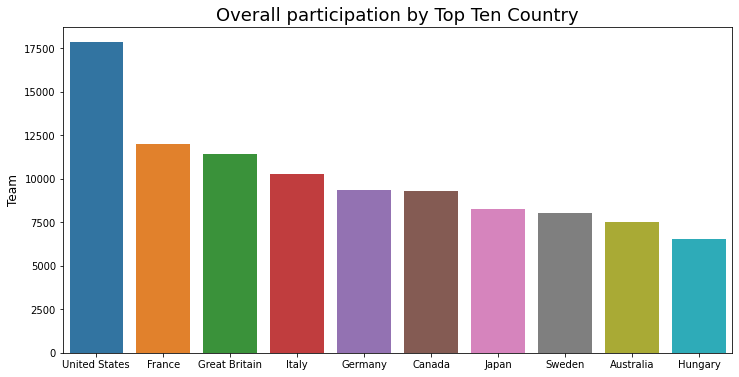

In [14]:
# Plot for top 10 countries

plt.figure(figsize=(12,6));
plt.ylabel("",fontsize=12);
plt.title("Overall participation by Top Ten Country", fontsize= 18);
sns.barplot(x= top_10_countries.index, y= top_10_countries);

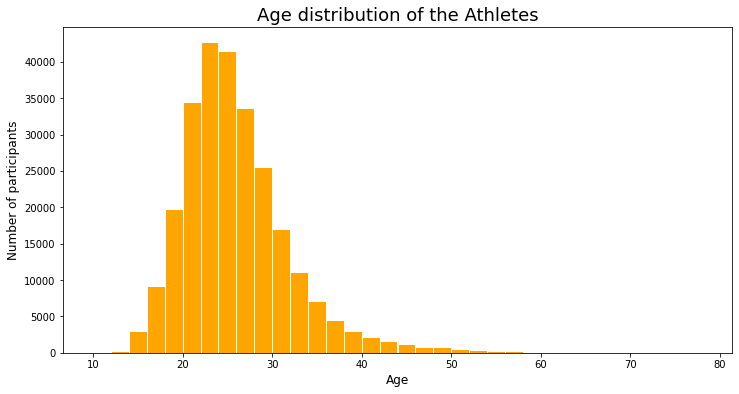

In [15]:
# Age distribution of participants

plt.figure(figsize=(12,6));
plt.title("Age distribution of the Athletes", fontsize= 18);
plt.xlabel('Age', fontsize= 12);
plt.ylabel('Number of participants', fontsize=12);
plt.hist(athletes_df.Age, bins= np.arange(10,80,2), color= 'orange', edgecolor= 'white');
plt.show();

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


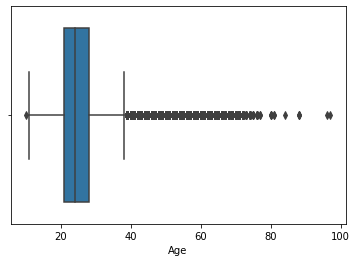

In [16]:
sns.boxplot(athletes_df.Age);

In [17]:
# Winter olympics sports

winter_sports = athletes_df[athletes_df['Season'] == 'Winter']
winter_sports.Sport.unique()

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [18]:
# Summer olympics sports

summer_sports = athletes_df[athletes_df['Season'] == 'Summer']
summer_sports.Sport.unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


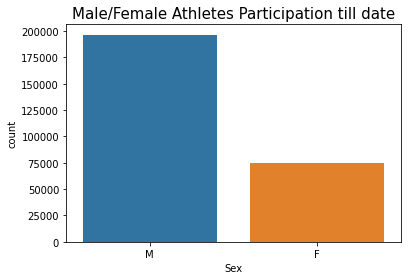

In [19]:
# Male and Female participants
sns.countplot(athletes_df.Sex);
plt.title('Male/Female Athletes Participation till date', fontsize=15);

In [20]:
# Total Medals
athletes_df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [21]:
sp = summer_sports.Sport.value_counts().reset_index()
sp.head()

,index,Sport
0,Athletics,38624
1,Gymnastics,26707
2,Swimming,23195
3,Shooting,11448
4,Cycling,10859


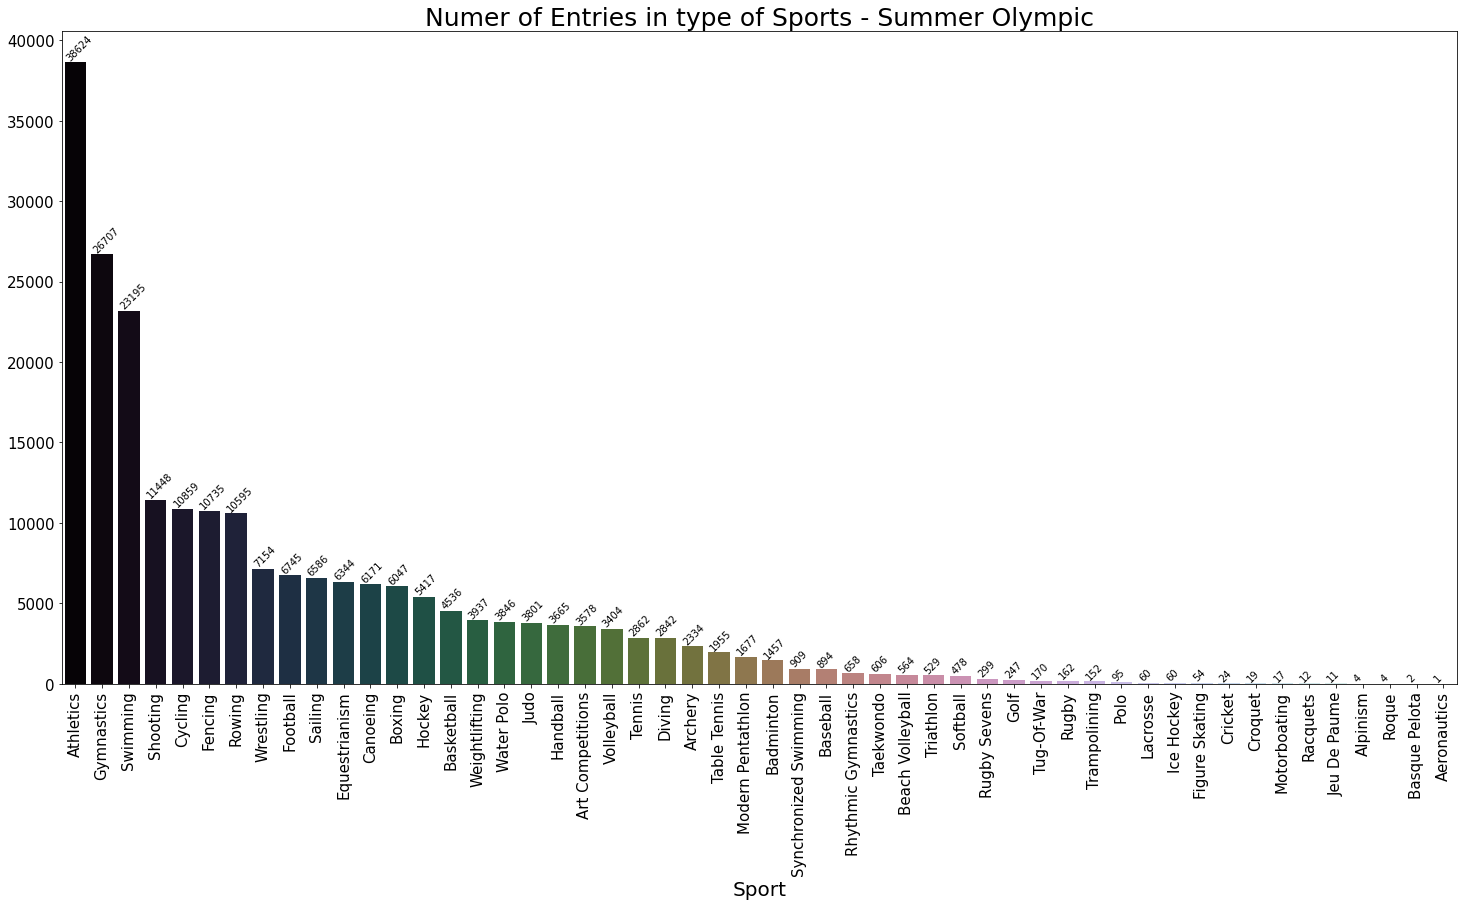

In [22]:
plt.figure(figsize=(25,12));
ax = sns.barplot(x= 'index', y= 'Sport', data= sp, palette= 'cubehelix')
plt.title('Numer of Entries in type of Sports - Summer Olympic', fontsize=25);
plt.xlabel('Sport', fontsize=20);
plt.ylabel(None);
plt.xticks(fontsize=15, rotation=90);
plt.yticks(fontsize=15);
# plt.show();
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x(), p.get_height()+1), va='bottom', color= 'black', rotation= 45)
plt.show();

In [23]:
wp = winter_sports.Sport.value_counts().reset_index()
wp.head()

,index,Sport
0,Cross Country Skiing,9133
1,Alpine Skiing,8829
2,Speed Skating,5613
3,Ice Hockey,5456
4,Biathlon,4893


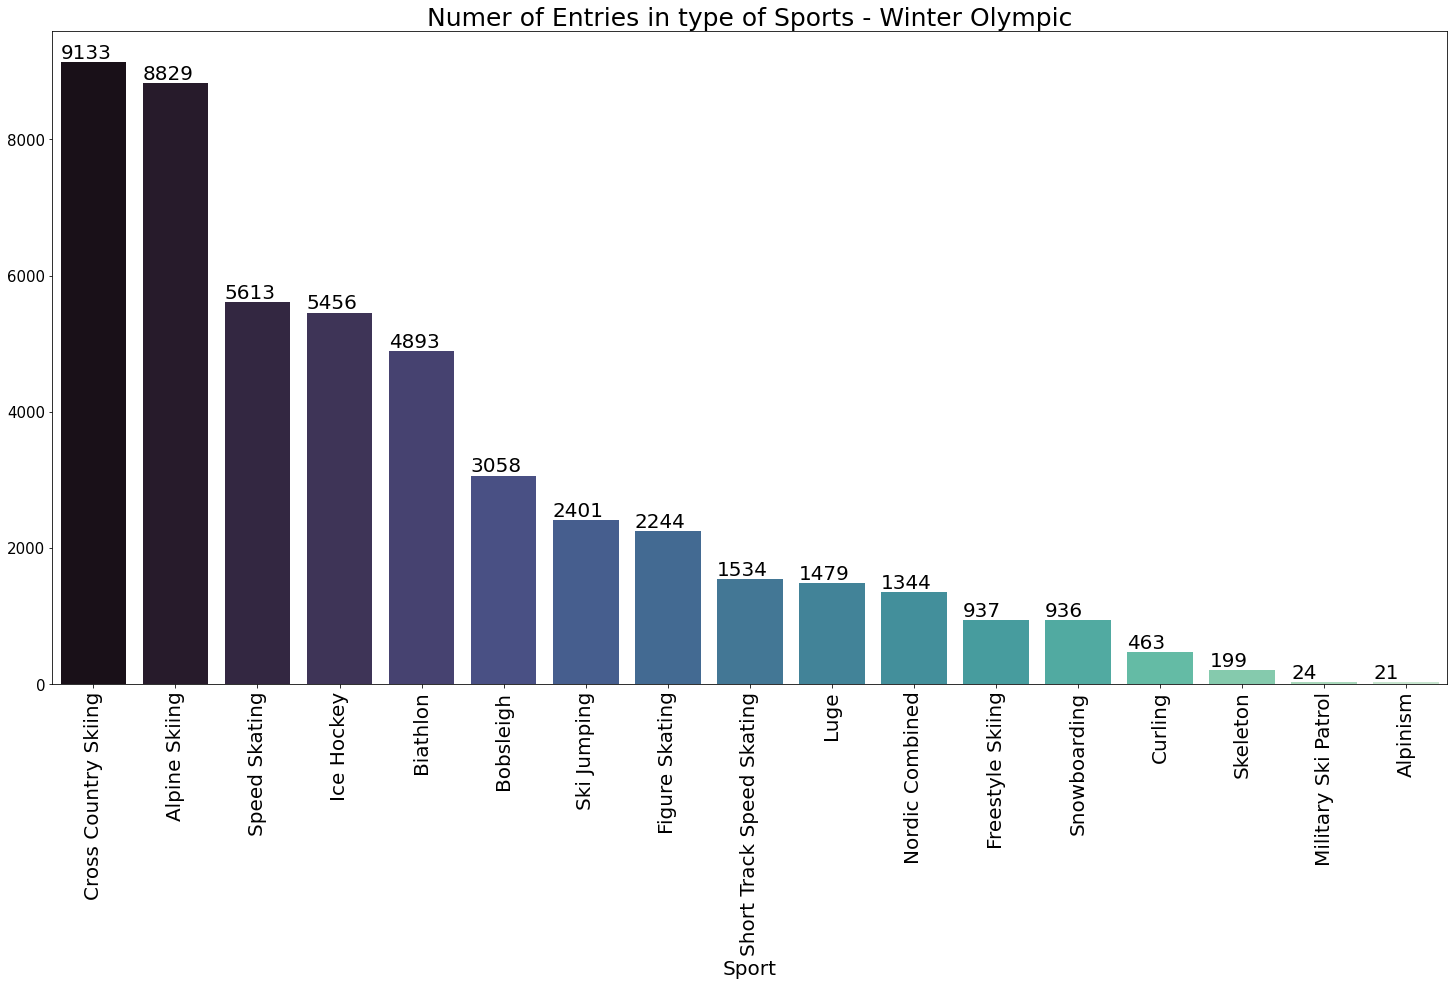

In [24]:
plt.figure(figsize=(25,12));
ax = sns.barplot(x= 'index', y= 'Sport', data= wp, palette= 'mako')
plt.title('Numer of Entries in type of Sports - Winter Olympic', fontsize=25);
plt.xlabel('Sport', fontsize=20);
plt.ylabel(None);
plt.xticks(fontsize=20, rotation=90);
plt.yticks(fontsize=15);

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x(), p.get_height()+1), va='bottom', color= 'black', size=20)
plt.show();

---

## Women Olympics

In [25]:
# Total number of female athletes in each olympics

female_participants = athletes_df[(athletes_df.Sex == 'F') & (athletes_df.Season == 'Summer')][['Sex','Year']]
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants.rename(columns= {'Year':'Year_summer','Sex':'Female'}, inplace=True)
female_participants

,Year_summer,Female
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87
5,1920,134
6,1924,244
7,1928,404
8,1932,347
9,1936,468


In [26]:
women_olympics_summer = athletes_df[(athletes_df.Sex == 'F') & (athletes_df.Season == 'Summer')]

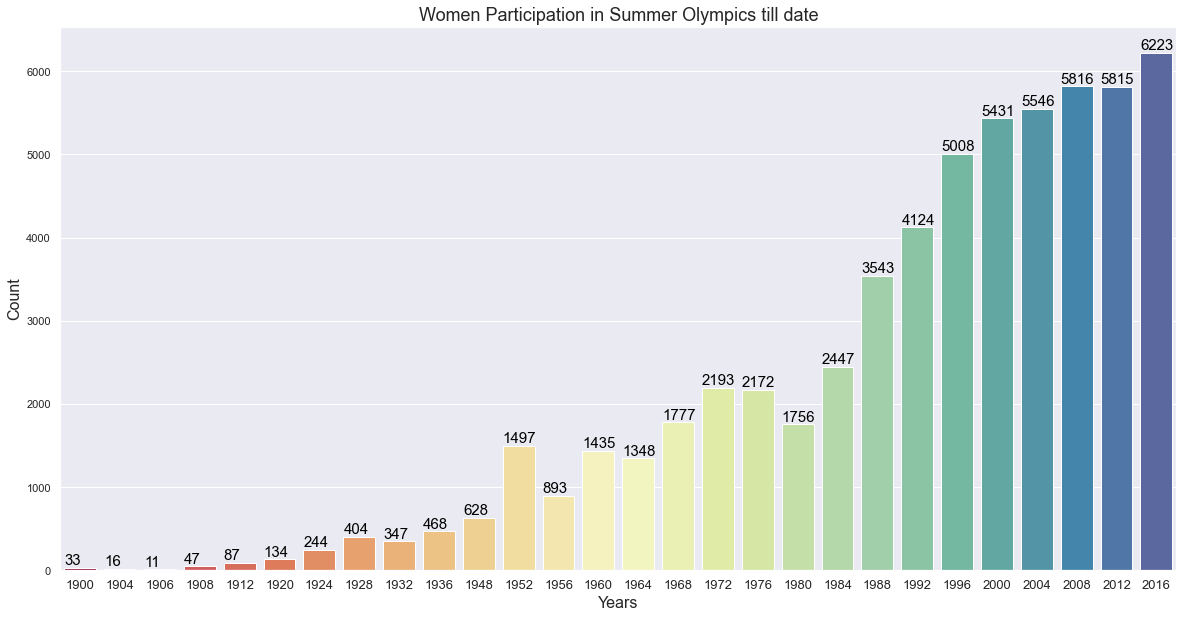

In [27]:
sns.set(style= "darkgrid")
plt.figure(figsize=(20,10));
ax = sns.countplot(x= 'Year', data= women_olympics_summer, palette= "Spectral");
plt.title('Women Participation in Summer Olympics till date', fontsize=18);
plt.xlabel('Years', fontsize=16);
plt.ylabel('Count', fontsize=16);
plt.xticks(fontsize=13);

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x(), p.get_height()+1), va='bottom', color= 'black', size=15)
plt.show();

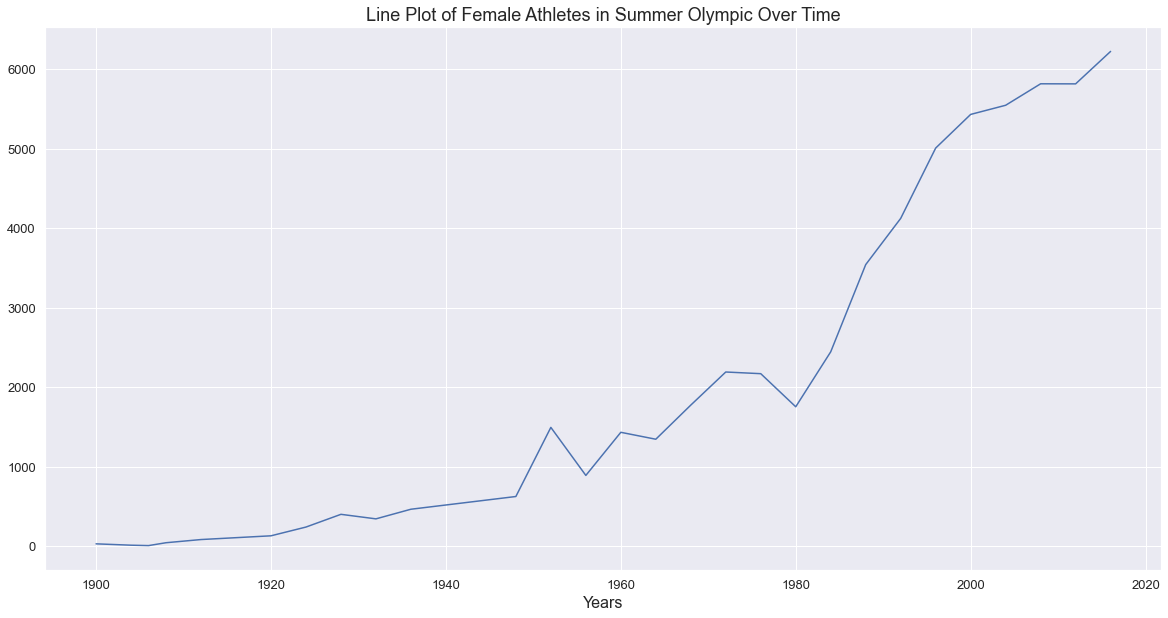

In [28]:
part = women_olympics_summer.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10));
part.loc[:,'F'].plot();
plt.title("Line Plot of Female Athletes in Summer Olympic Over Time", fontsize=18);
plt.xlabel('Years', fontsize=16);
plt.yticks(fontsize=13);
plt.xticks(fontsize=13);
plt.show();

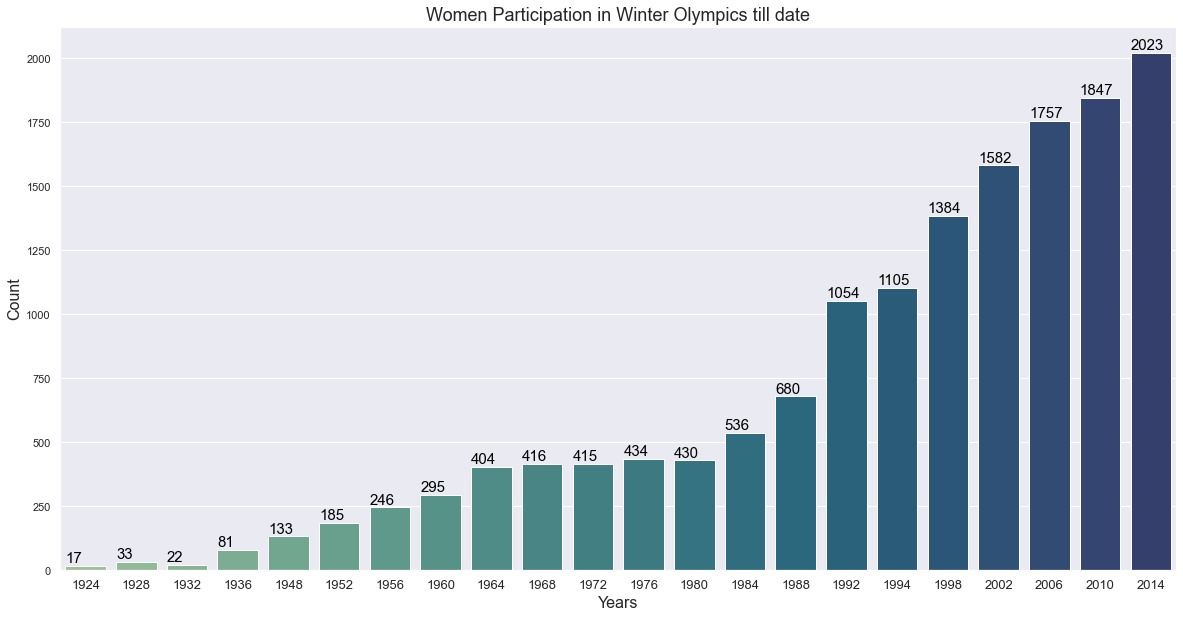

In [29]:
women_olympics_winter = athletes_df[(athletes_df.Sex == 'F') & (athletes_df.Season == 'Winter')]

sns.set(style= "darkgrid")
plt.figure(figsize=(20,10));
ax = sns.countplot(x= 'Year', data= women_olympics_winter, palette= "crest");
plt.title('Women Participation in Winter Olympics till date', fontsize=18);
plt.xlabel('Years', fontsize=16);
plt.ylabel('Count', fontsize=16);
plt.xticks(fontsize=13);

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x(), p.get_height()+1), va='bottom', color= 'black', size=15)
plt.show();

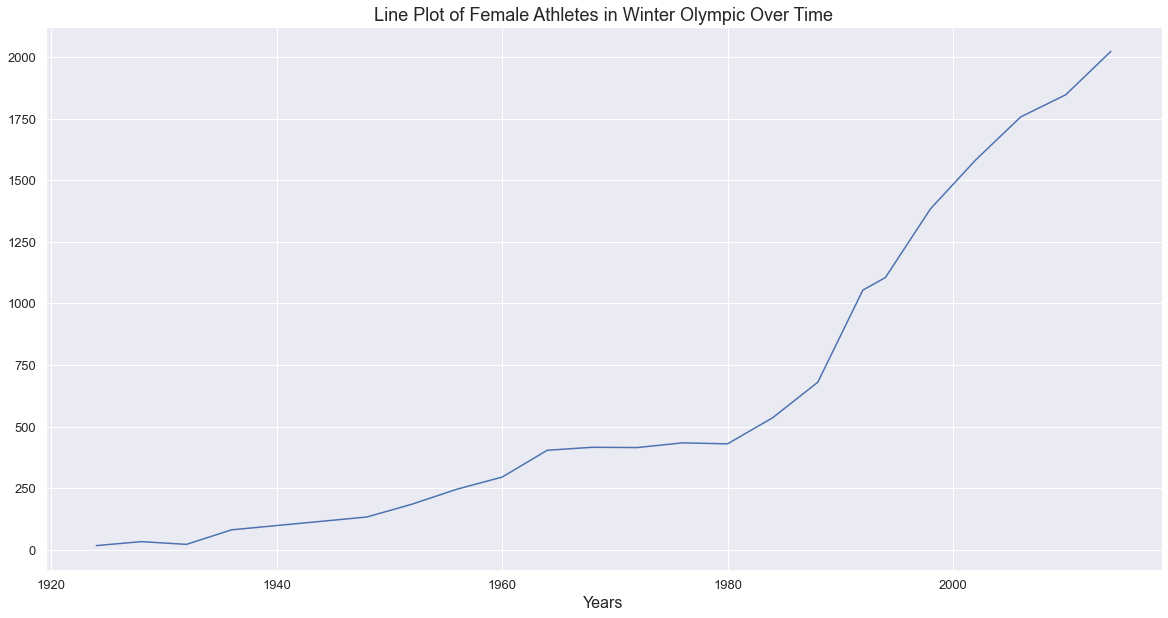

In [30]:
part = women_olympics_winter.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10));
part.loc[:,'F'].plot();
plt.title("Line Plot of Female Athletes in Winter Olympic Over Time", fontsize=18);
plt.xlabel('Years', fontsize=16);
plt.yticks(fontsize=13);
plt.xticks(fontsize=13);
plt.show();

## Men Olympics

In [31]:
men_olympics_summer = athletes_df[(athletes_df.Sex == 'M') & (athletes_df.Season == 'Summer')]

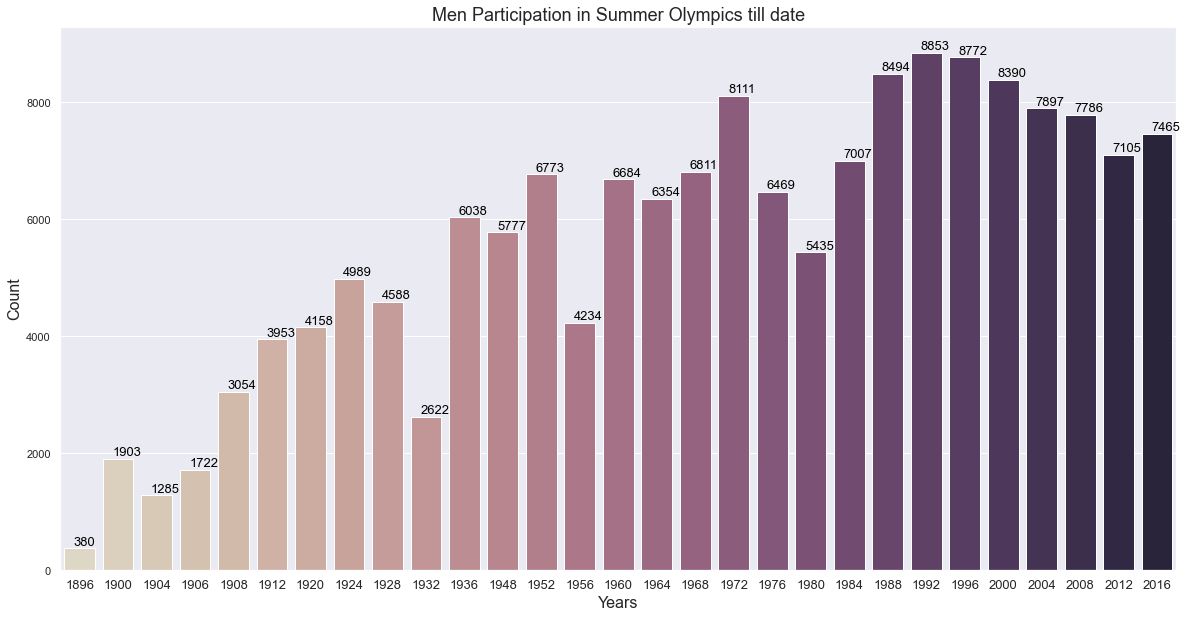

In [32]:
sns.set(style= "darkgrid")
plt.figure(figsize=(20,10));
ax = sns.countplot(x= 'Year', data= men_olympics_summer, palette= "ch:s=-.2,r=.6");
plt.title('Men Participation in Summer Olympics till date', fontsize=18);
plt.xlabel('Years', fontsize=16);
plt.ylabel('Count', fontsize=16);
plt.xticks(fontsize=13);

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black', size=13)
plt.show();

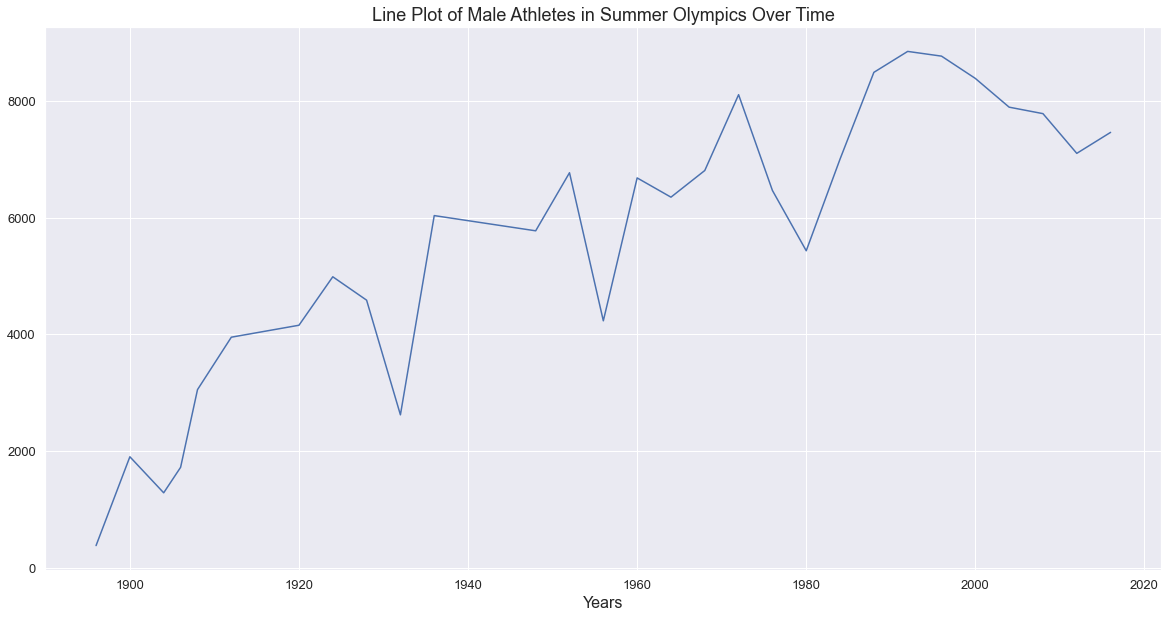

In [33]:
part = men_olympics_summer.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10));
part.loc[:,'M'].plot();
plt.title("Line Plot of Male Athletes in Summer Olympics Over Time", fontsize=18);
plt.xlabel('Years', fontsize=16);
plt.yticks(fontsize=13);
plt.xticks(fontsize=13);
plt.show();

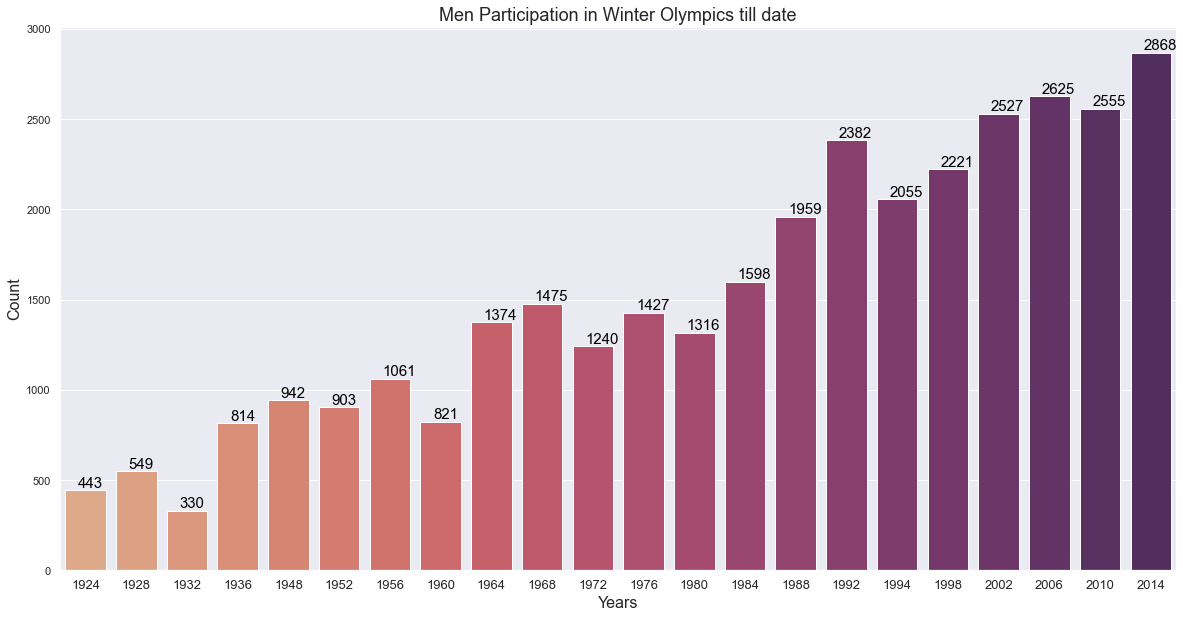

In [34]:
men_olympics_winter = athletes_df[(athletes_df.Sex == 'M') & (athletes_df.Season == 'Winter')]

sns.set(style= "darkgrid")
plt.figure(figsize=(20,10));
ax = sns.countplot(x= 'Year', data= men_olympics_winter, palette= "flare");
plt.title('Men Participation in Winter Olympics till date', fontsize=18);
plt.xlabel('Years', fontsize=16);
plt.ylabel('Count', fontsize=16);
plt.xticks(fontsize=13);

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black', size=15)
plt.show();

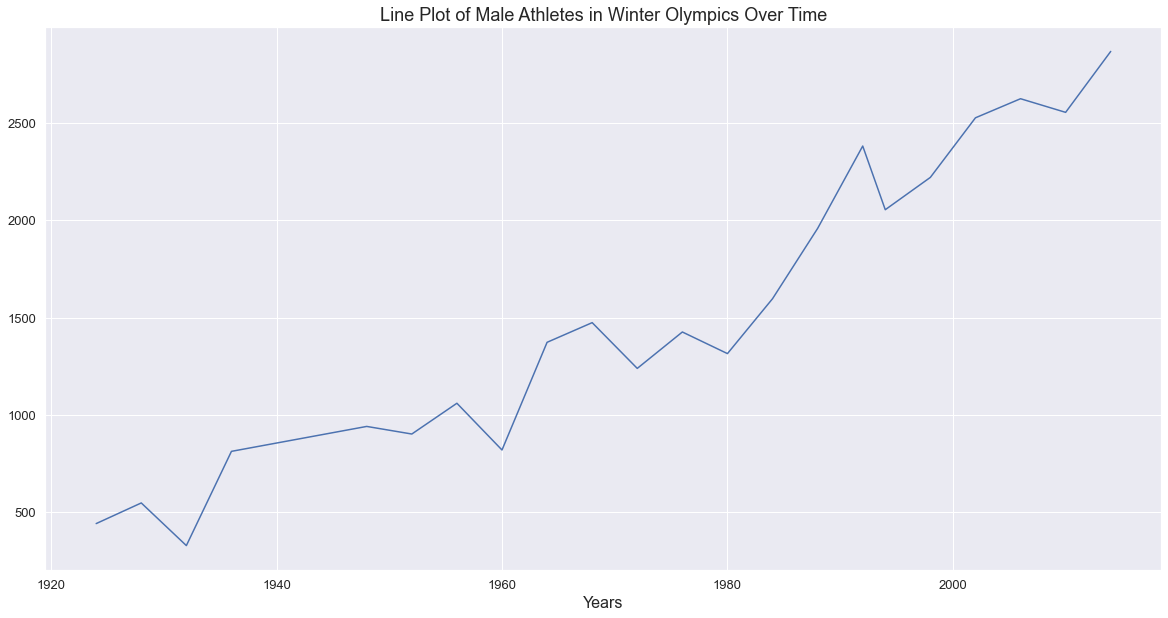

In [35]:
part = men_olympics_winter.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10));
part.loc[:,'M'].plot();
plt.title("Line Plot of Male Athletes in Winter Olympics Over Time", fontsize=18);
plt.xlabel('Years', fontsize=16);
plt.yticks(fontsize=13);
plt.xticks(fontsize=13);
plt.show();

# Total Medals

In [36]:
# Total Medals per country

medals = athletes_df[(athletes_df.Medal.isin(['Gold','Silver','Bronze']))]
medals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,NaN
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN


In [37]:
# Checking any null values
medals['Medal'].isnull().sum()

0

In [38]:
medals['Region'].value_counts().head(10)

USA          5637
Russia       3947
Germany      3756
UK           2068
France       1777
Italy        1637
Sweden       1536
Canada       1352
Australia    1349
Hungary      1135
Name: Region, dtype: int64

<Figure size 1440x720 with 0 Axes>

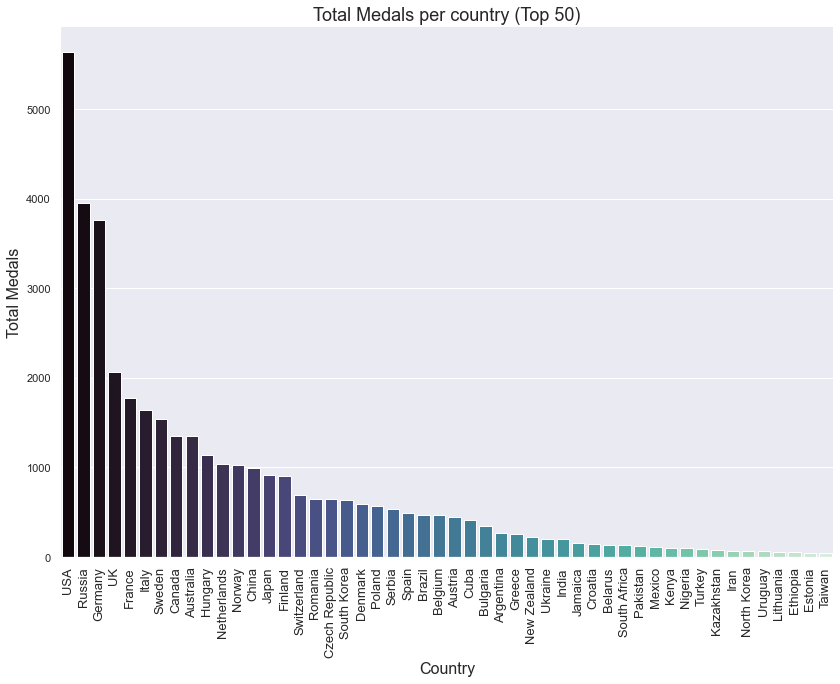

In [39]:
plt.figure(figsize=(20,10));
sns.catplot(x= 'index', y= 'Medal', data= medals.Region.value_counts().reset_index(name= 'Medal').head(50), height= 8, aspect=11.7/8, kind= 'bar', palette="mako");
plt.title('Total Medals per country (Top 50)', fontsize=18);
plt.xlabel('Country', fontsize=16);
plt.ylabel('Total Medals', fontsize=16);
plt.xticks(fontsize=13, rotation=90);
plt.show();

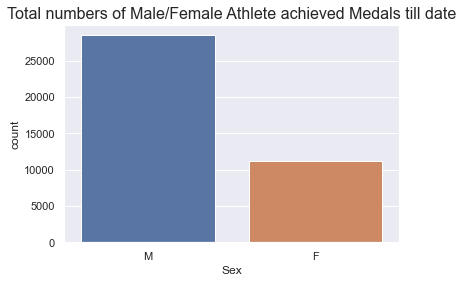

In [65]:
sns.countplot(x='Sex',data= medals);
plt.title('Total numbers of Male/Female Athlete achieved Medals till date', fontsize= 16);

In [68]:
# Top ten countries
a_10 = medals[(medals.Region.isin(['USA','Germany','Russia','UK','France','Italy','Sweden','Hungary','Canada', 'Australia']))]

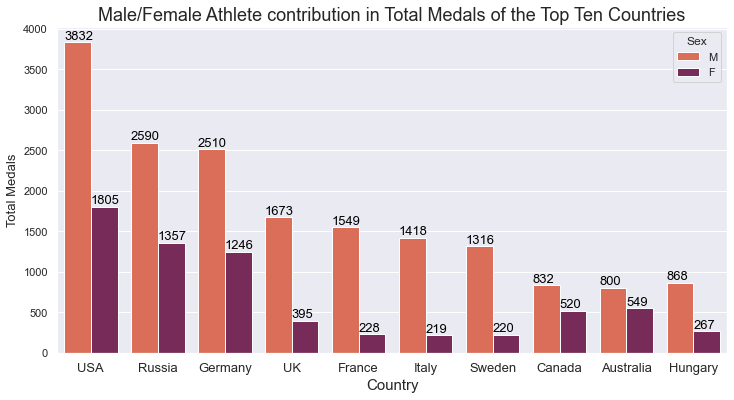

In [80]:
plt.figure(figsize=(12,6));
ax = sns.countplot(x='Region',data= a_10, hue='Sex',palette='rocket_r',
                  order= ['USA','Russia','Germany','UK','France','Italy','Sweden','Canada','Australia','Hungary']);
plt.xlabel("Country", fontsize=15);
plt.ylabel("Total Medals", fontsize=13);
plt.xticks(fontsize= 13);
plt.title('Male/Female Athlete contribution in Total Medals of the Top Ten Countries', fontsize=18);
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x(), p.get_height()+1), va='bottom', color= 'black', size=13)

---

### Gold Medal Athletes

In [45]:
# Gold Medal athletes

goldmedals = athletes_df[(athletes_df.Medal == 'Gold')]
goldmedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [46]:
# Take only the values that are different from NaN.
goldmedals = goldmedals[np.isfinite(goldmedals['Age'])]

In [47]:
# Gold medals for athletes beyond the age of 60 years
goldmedals['ID'][goldmedals['Age'] > 60].count()

6

In [48]:
sport_event_60 = goldmedals['Sport'][goldmedals['Age'] > 60]
sport_event_60

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


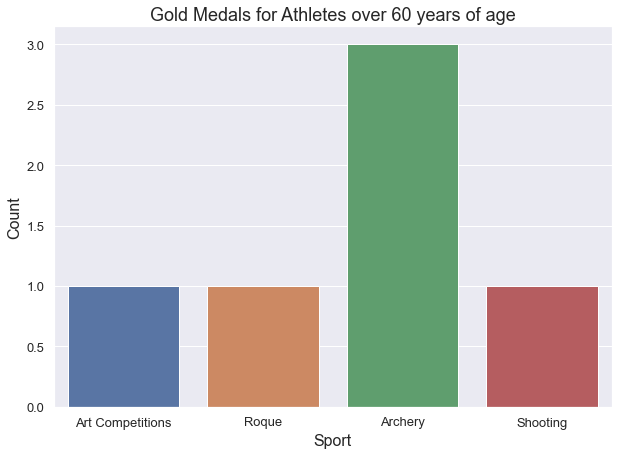

In [49]:
# Plot for sport_event_60

plt.figure(figsize=(10,7));
plt.tight_layout();
sns.countplot(sport_event_60);
plt.title('Gold Medals for Athletes over 60 years of age', fontsize=18);
plt.xlabel('Sport', fontsize=16);
plt.ylabel('Count', fontsize=16);
plt.yticks(fontsize=13);
plt.xticks(fontsize=13);
plt.show();

In [50]:
# Gold medals from each country
total_goldmedals = goldmedals.Region.value_counts().reset_index(name= 'Medal')
total_goldmedals

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567
...,...,...
92,Jordan,1
93,Grenada,1
94,Tajikistan,1
95,Kosovo,1


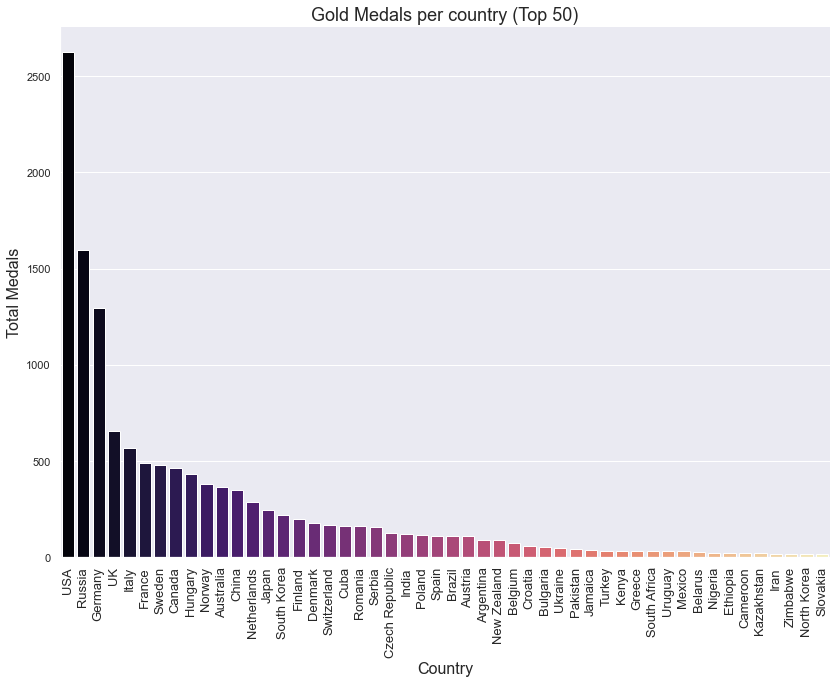

In [51]:
sns.catplot(x= 'index', y= 'Medal', data= total_goldmedals.head(50), height= 8, aspect=11.7/8, kind= 'bar', palette= "magma");
plt.title('Gold Medals per country (Top 50)', fontsize=18);
plt.xlabel('Country', fontsize=16);
plt.ylabel('Total Medals', fontsize=16);
plt.xticks(fontsize=13, rotation=90);
plt.show();

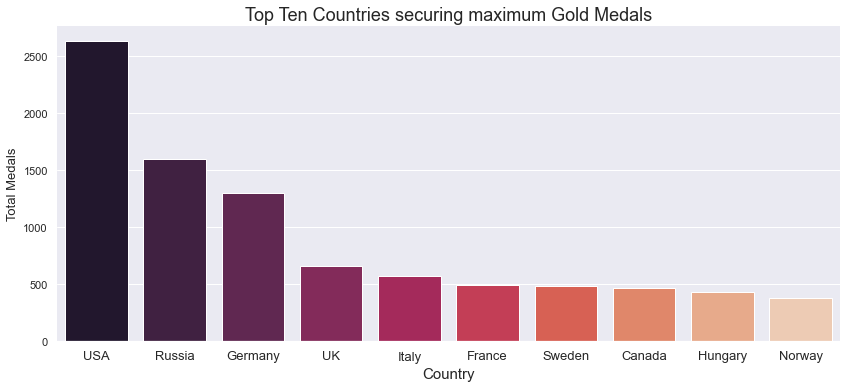

In [52]:
# Top ten countries having maximun gold medals
top_10_goldmedals = goldmedals.Region.value_counts().reset_index(name= 'Medal').head(10)

g = sns.catplot(x= 'index', y= 'Medal', data= top_10_goldmedals, height= 5, aspect=11.7/5, kind= 'bar', palette= "rocket");
g.despine(left= True)
g.set_xlabels("Country", fontsize=15);
g.set_ylabels("Total Medals", fontsize=13);
plt.xticks(fontsize= 13);
plt.title('Top Ten Countries securing maximum Gold Medals', fontsize=18);

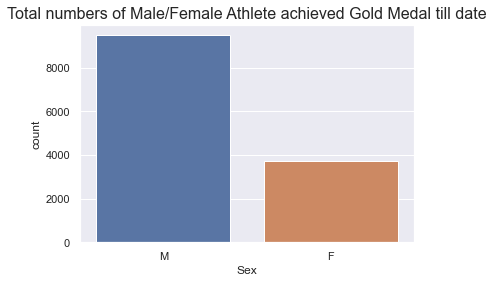

In [76]:
sns.countplot(x= 'Sex', data= goldmedals);
plt.title('Total numbers of Male/Female Athlete achieved Gold Medal till date', fontsize= 16);

In [53]:
gm = goldmedals[['Region','Sex','Medal']].value_counts().reset_index(level= ['Medal','Sex','Region'])
gm.rename(columns= {0:'Count'}, inplace= True)
gm.head()

,Region,Sex,Medal,Count
0,USA,M,Gold,1776
1,Russia,M,Gold,1035
2,Germany,M,Gold,856
3,USA,F,Gold,851
4,Russia,F,Gold,564


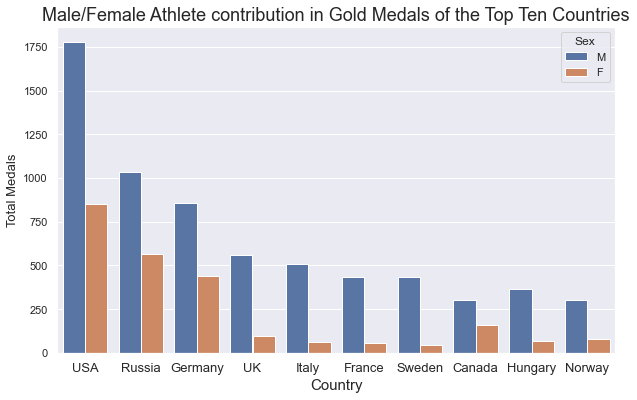

In [82]:
# Top ten countries
gm_10 = goldmedals[(goldmedals.Region.isin(['USA','Germany','Russia','UK','France','Italy','Sweden','Hungary','Canada', 'Norway']))]

plt.figure(figsize=(10,6));
sns.countplot(x='Region',data= gm_10, hue='Sex', 
              order= ['USA','Russia', 'Germany','UK','Italy','France','Sweden','Canada','Hungary','Norway']);
plt.xlabel("Country", fontsize=15);
plt.ylabel("Total Medals", fontsize=13);
plt.xticks(fontsize= 13);
plt.title('Male/Female Athlete contribution in Gold Medals of the Top Ten Countries', fontsize=18);

---

### Silver Medal Athletes

In [83]:
silvermedals = athletes_df[(athletes_df.Medal == 'Silver')]

# Take only the values that are different from NaN.
silvermedals = silvermedals[np.isfinite(silvermedals['Age'])]

# Silver medals from each country
total_silvermedals = silvermedals.Region.value_counts().reset_index(name= 'Medal')
total_silvermedals.head()

,index,Medal
0,USA,1619
1,Germany,1176
2,Russia,1169
3,UK,684
4,France,563


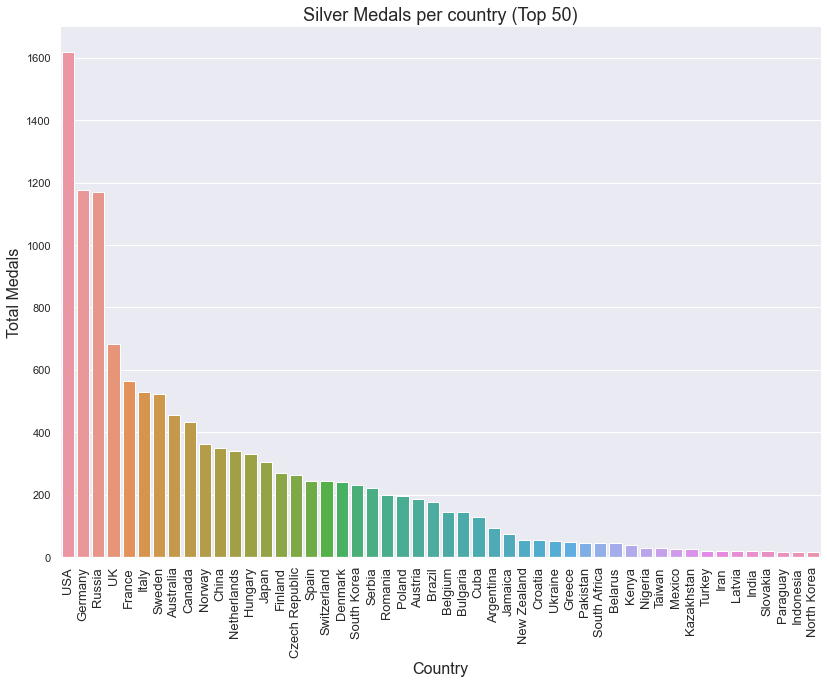

In [84]:
sns.catplot(x= 'index', y= 'Medal', data= total_silvermedals.head(50), height= 8, aspect=11.7/8, kind= 'bar');
plt.title('Silver Medals per country (Top 50)', fontsize=18);
plt.xlabel('Country', fontsize=16);
plt.ylabel('Total Medals', fontsize=16);
plt.xticks(fontsize=13, rotation=90);
plt.show();

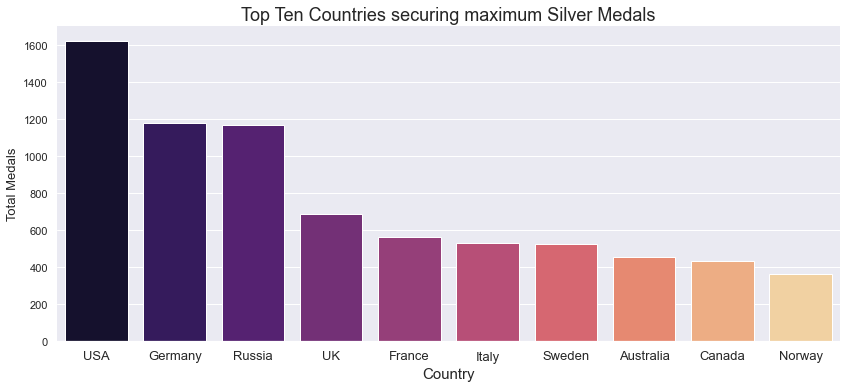

In [85]:
# Top ten countries having maximun silver medals
top_10_silvermedals = silvermedals.Region.value_counts().reset_index(name= 'Medal').head(10)

g = sns.catplot(x= 'index', y= 'Medal', data= top_10_silvermedals, height= 5, aspect=11.7/5, kind= 'bar', palette= "magma");
g.despine(left= True)
g.set_xlabels("Country", fontsize=15);
g.set_ylabels("Total Medals", fontsize=13);
plt.xticks(fontsize= 13);
plt.title('Top Ten Countries securing maximum Silver Medals', fontsize=18);

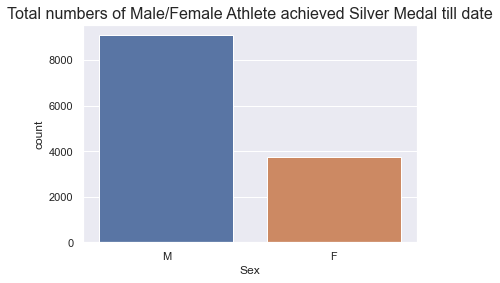

In [91]:
sns.countplot(x= 'Sex', data= silvermedals);
plt.title('Total numbers of Male/Female Athlete achieved Silver Medal till date', fontsize= 16);

In [86]:
sm = silvermedals[['Region','Sex','Medal']].value_counts().reset_index(level= ['Medal','Sex','Region'])
sm.rename(columns= {0:'Count'}, inplace= True)
sm.head()

,Region,Sex,Medal,Count
0,USA,M,Silver,1085
1,Russia,M,Silver,773
2,Germany,M,Silver,768
3,UK,M,Silver,555
4,USA,F,Silver,534


In [88]:
# Top ten countries
sm_10 = sm[(sm.Region.isin(['USA','Germany','Russia','UK','France','Italy','Sweden','Australia','Canada', 'Norway']))]
sm_10.head()

,Region,Sex,Medal,Count
0,USA,M,Silver,1085
1,Russia,M,Silver,773
2,Germany,M,Silver,768
3,UK,M,Silver,555
4,USA,F,Silver,534


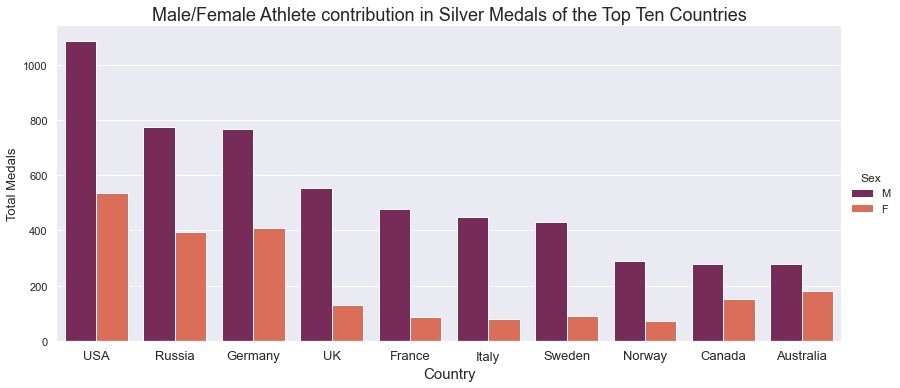

In [89]:
g = sns.catplot(x= 'Region', y= 'Count', data= sm_10, hue= 'Sex', height= 5, aspect=11.7/5, kind= 'bar', palette= "rocket");
g.despine(left= True)
g.set_xlabels("Country", fontsize=15);
g.set_ylabels("Total Medals", fontsize=13);
plt.xticks(fontsize= 13);
plt.title('Male/Female Athlete contribution in Silver Medals of the Top Ten Countries', fontsize=18);

---

### Bronze Medal Athletes

In [101]:
bronzemedals = athletes_df[(athletes_df.Medal == 'Bronze')]

# Take only the values that are different from NaN.
bronzemedals = bronzemedals[np.isfinite(bronzemedals['Age'])]

# Silver medals from each country
total_bronzemedals = bronzemedals.Region.value_counts().reset_index(name= 'Medal')
total_bronzemedals.head()

,index,Medal
0,USA,1346
1,Germany,1254
2,Russia,1176
3,France,627
4,UK,624


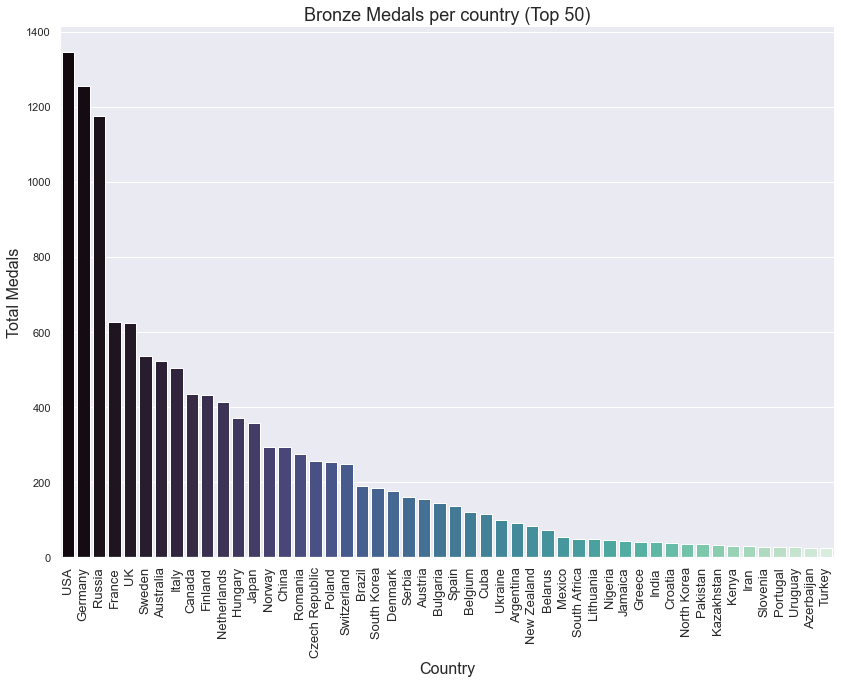

In [102]:
sns.catplot(x= 'index', y= 'Medal', data= total_bronzemedals.head(50), height= 8, aspect=11.7/8, kind= 'bar', palette= 'mako');
plt.title('Bronze Medals per country (Top 50)', fontsize=18);
plt.xlabel('Country', fontsize=16);
plt.ylabel('Total Medals', fontsize=16);
plt.xticks(fontsize=13, rotation=90);
plt.show();

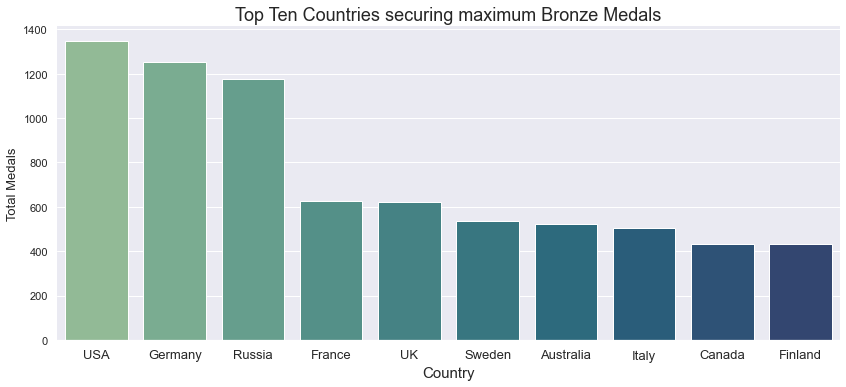

In [103]:
# Top ten countries having maximun bronze medals
top_10_bronzemedals = bronzemedals.Region.value_counts().reset_index(name= 'Medal').head(10)

g = sns.catplot(x= 'index', y= 'Medal', data= top_10_bronzemedals, height= 5, aspect=11.7/5, kind= 'bar', palette= "crest");
g.despine(left= True)
g.set_xlabels("Country", fontsize=15);
g.set_ylabels("Total Medals", fontsize=13);
plt.xticks(fontsize= 13);
plt.title('Top Ten Countries securing maximum Bronze Medals', fontsize=18);

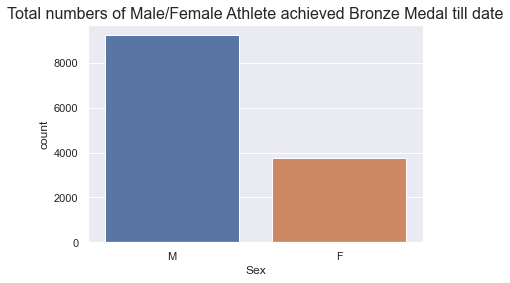

In [104]:
sns.countplot(x= 'Sex', data= bronzemedals);
plt.title('Total numbers of Male/Female Athlete achieved Bronze Medal till date', fontsize= 16);

In [105]:
bm = bronzemedals[['Region','Sex','Medal']].value_counts().reset_index(level= ['Medal','Sex','Region'])
bm.rename(columns= {0:'Count'}, inplace= True)
bm.head()

,Region,Sex,Medal,Count
0,USA,M,Bronze,927
1,Germany,M,Bronze,853
2,Russia,M,Bronze,779
3,France,M,Bronze,541
4,UK,M,Bronze,464


In [106]:
# Top ten countries
bm_10 = bm[(bm.Region.isin(['USA','Germany','Russia','UK','France','Italy','Sweden','Australia','Canada', 'Norway']))]
bm_10.head()

,Region,Sex,Medal,Count
0,USA,M,Bronze,927
1,Germany,M,Bronze,853
2,Russia,M,Bronze,779
3,France,M,Bronze,541
4,UK,M,Bronze,464


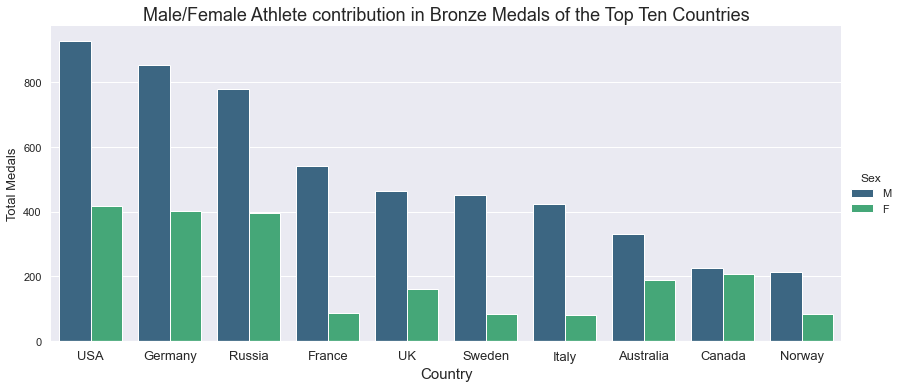

In [107]:
g = sns.catplot(x= 'Region', y= 'Count', data= bm_10, hue= 'Sex', height= 5, aspect=11.7/5, kind= 'bar', palette= "viridis");
g.despine(left= True)
g.set_xlabels("Country", fontsize=15);
g.set_ylabels("Total Medals", fontsize=13);
plt.xticks(fontsize= 13);
plt.title('Male/Female Athlete contribution in Bronze Medals of the Top Ten Countries', fontsize=18);

---

# Rio Olympics 2016 (Summer) --> Latest Data

In [109]:
x = 2016
rio_olympics = athletes_df[(athletes_df.Year == x)]
rio_olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Romania,NaN
139,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN,Spain,NaN
140,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN,Spain,NaN
141,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NaN,Spain,NaN
142,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NaN,Spain,NaN


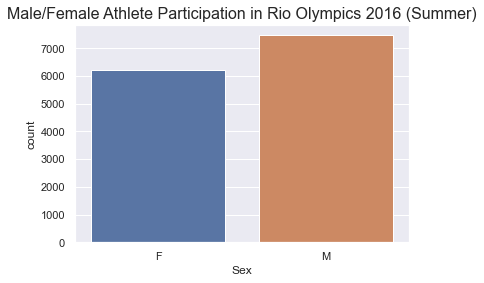

In [110]:
sns.countplot(x= 'Sex', data= rio_olympics);
plt.title('Male/Female Athlete Participation in Rio Olympics 2016 (Summer)', fontsize= 16);

In [111]:
rio_medals = rio_olympics[(rio_olympics.Medal.isin(['Gold','Silver','Bronze']))]
rio_medals['Medal'].isnull().sum()

0

In [112]:
total_rio_medals = rio_medals.Region.value_counts().reset_index(name= 'Medal')
total_rio_medals.head()

,index,Medal
0,USA,264
1,Germany,159
2,UK,145
3,Russia,115
4,China,113


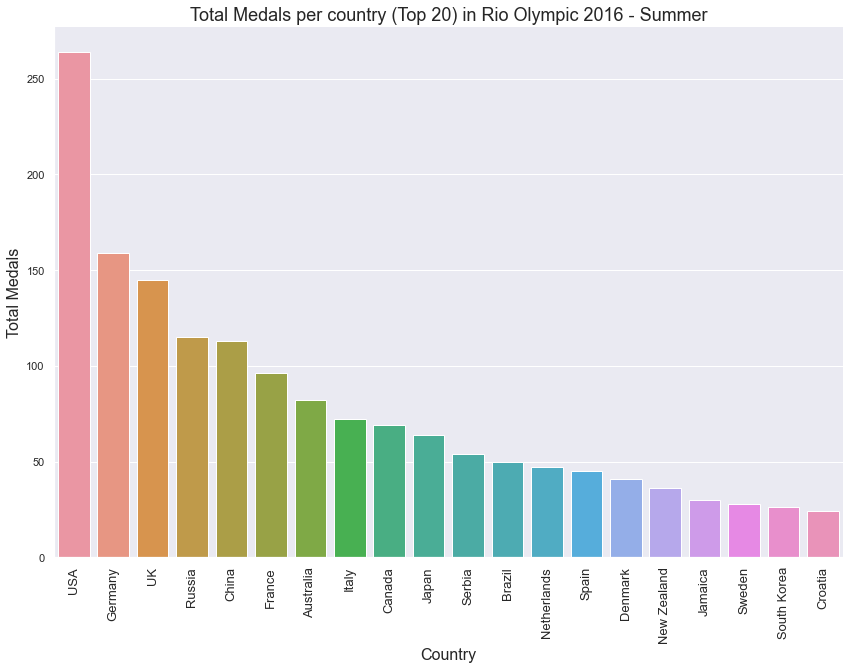

In [113]:
sns.catplot(x= 'index', y= 'Medal', data= total_rio_medals.head(20), height= 8, aspect=11.7/8, kind= 'bar');
plt.title('Total Medals per country (Top 20) in Rio Olympic 2016 - Summer', fontsize=18);
plt.xlabel('Country', fontsize=16);
plt.ylabel('Total Medals', fontsize=16);
plt.xticks(fontsize=13, rotation=90);
plt.show();

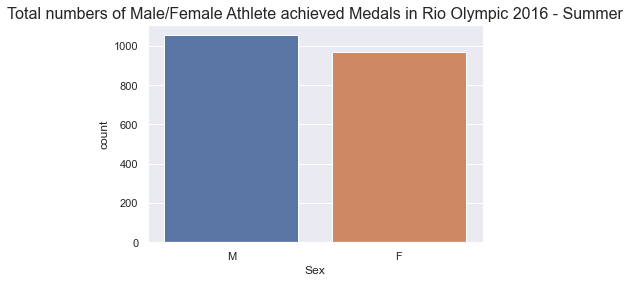

In [133]:
sns.countplot(x= 'Sex', data= rio_medals);
plt.title('Total numbers of Male/Female Athlete achieved Medals in Rio Olympic 2016 - Summer', fontsize= 16);

In [114]:
ro = rio_olympics[['Region','Sex','Medal']].value_counts().reset_index(level= ['Medal','Sex','Region'])
ro.rename(columns= {0:'Count'}, inplace= True)
ro.head()

,Region,Sex,Medal,Count
0,USA,F,Gold,85
1,USA,M,Gold,54
2,Canada,F,Bronze,53
3,Germany,M,Bronze,44
4,Russia,F,Gold,41


In [134]:
# Top ten countries
ro_10 = rio_medals[(rio_medals.Region.isin(['USA','Germany','Russia','UK','China','France','Italy','Japan','Australia','Canada']))]

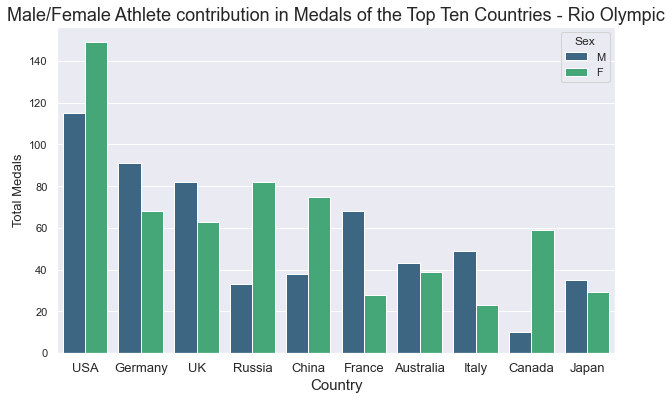

In [136]:
plt.figure(figsize=(10,6));
sns.countplot(x='Region',data= ro_10, hue='Sex',palette='viridis',
             order= ['USA','Germany','UK','Russia','China','France','Australia','Italy','Canada','Japan']);
plt.xlabel("Country", fontsize=15);
plt.ylabel("Total Medals", fontsize=13);
plt.xticks(fontsize= 13);
plt.title('Male/Female Athlete contribution in Medals of the Top Ten Countries - Rio Olympic', fontsize=18);

## Gold Medal Athletes

In [118]:
# Gold Medals
rio_gold = athletes_df[(athletes_df.Year == x) & (athletes_df.Medal == 'Gold')]

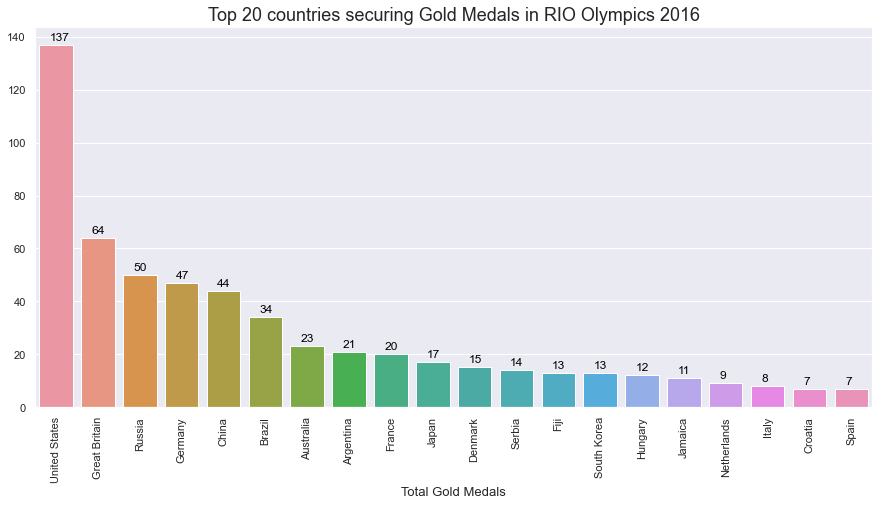

In [119]:
plt.figure(figsize=(15,7));
ax = sns.barplot(y= rio_gold['Team'].value_counts().head(20), x= rio_gold['Team'].value_counts().head(20).index);
plt.xlabel("Total Gold Medals", fontsize=13);
plt.ylabel(None);
plt.xticks(rotation=90);
plt.title('Top 20 countries securing Gold Medals in RIO Olympics 2016', fontsize=18);

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
plt.show();

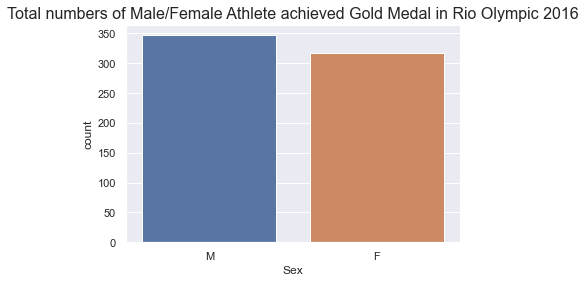

In [137]:
sns.countplot(x= 'Sex', data= rio_gold);
plt.title('Total numbers of Male/Female Athlete achieved Gold Medal in Rio Olympic 2016', fontsize= 16);

In [138]:
rio_gm = rio_gold[['Region','Sex','Medal']].value_counts().reset_index(level= ['Medal','Sex','Region'])
rio_gm.rename(columns= {0:'Count'}, inplace= True)
rio_gm.head()

,Region,Sex,Medal,Count
0,USA,F,Gold,85
1,USA,M,Gold,54
2,Russia,F,Gold,41
3,UK,M,Gold,36
4,Brazil,M,Gold,33


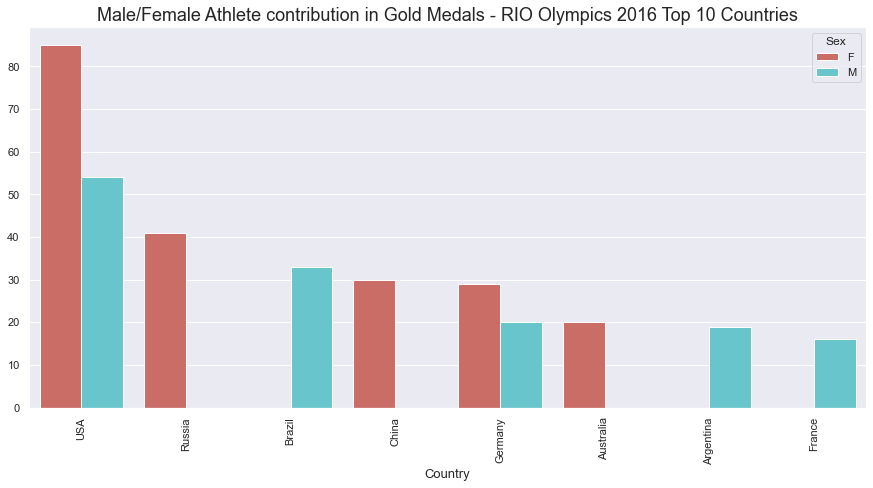

In [122]:
# Top ten countries
rio_gm_10 = rio_gm[(rio_gm.Region.isin(['USA','Germany','Russia','Great Britain','China','France','Brazil','Japan','Australia','Argentina']))]

plt.figure(figsize=(15,7));
ax = sns.barplot(x= 'Region', y= 'Count', data= rio_gm_10.head(10), hue='Sex', palette= 'hls');
plt.xlabel("Country", fontsize=13);
plt.ylabel(None);
plt.xticks(rotation=90);
plt.title('Male/Female Athlete contribution in Gold Medals - RIO Olympics 2016 Top 10 Countries', fontsize=18);

## Silver Medal Athletes

In [123]:
# Gold Medals
rio_silver = athletes_df[(athletes_df.Year == x) & (athletes_df.Medal == 'Silver')]

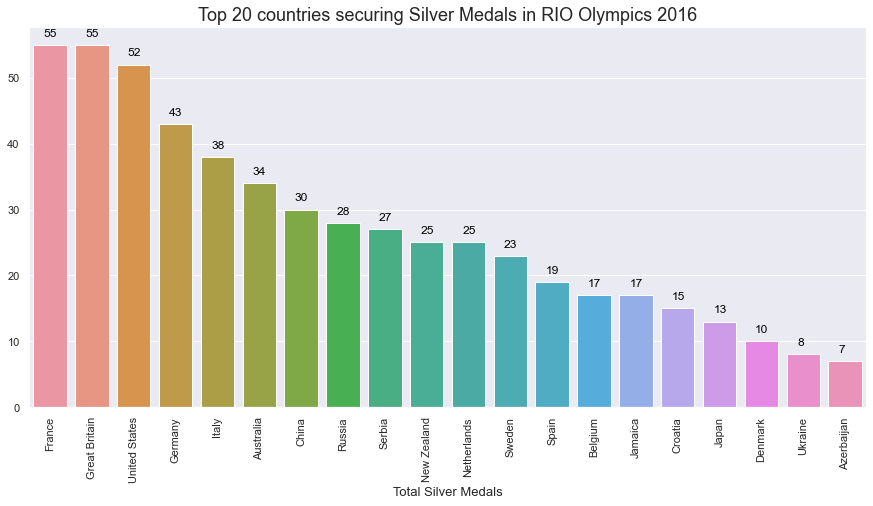

In [124]:
plt.figure(figsize=(15,7));
ax = sns.barplot(y= rio_silver['Team'].value_counts().head(20), x= rio_silver['Team'].value_counts().head(20).index);
plt.xlabel("Total Silver Medals", fontsize=13);
plt.ylabel(None);
plt.xticks(rotation=90);
plt.title('Top 20 countries securing Silver Medals in RIO Olympics 2016', fontsize=18);

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
plt.show();

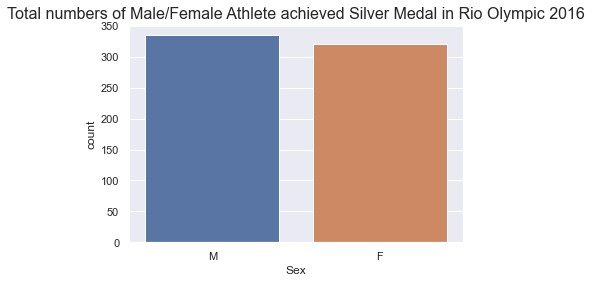

In [139]:
sns.countplot(x= 'Sex', data= rio_silver);
plt.title('Total numbers of Male/Female Athlete achieved Silver Medal in Rio Olympic 2016', fontsize= 16);

In [140]:
rio_sm = rio_silver[['Region','Sex','Medal']].value_counts().reset_index(level= ['Medal','Sex','Region'])
rio_sm.rename(columns= {0:'Count'}, inplace= True)
rio_sm.head()

,Region,Sex,Medal,Count
0,UK,M,Silver,35
1,France,M,Silver,33
2,USA,F,Silver,29
3,Germany,M,Silver,27
4,USA,M,Silver,25


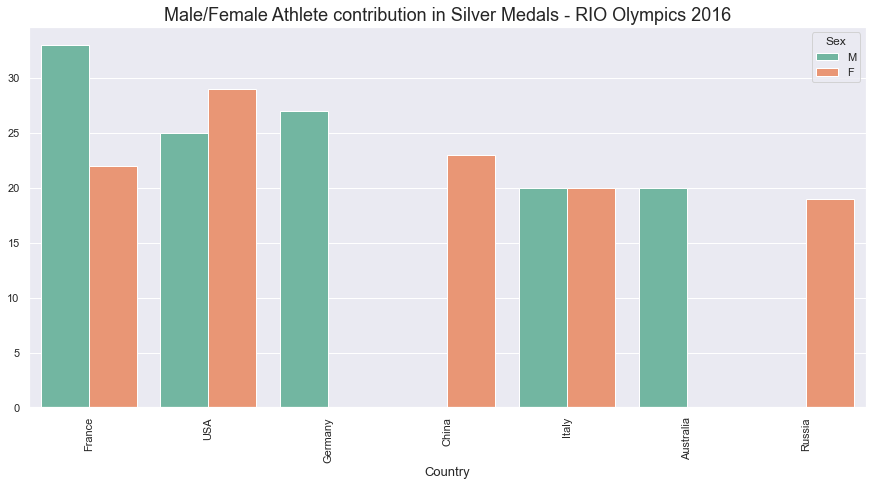

In [127]:
# Top ten countries
rio_sm_10 = rio_sm[(rio_sm.Region.isin(['USA','Germany','Russia','Great Britain','China','France','Italy','Serbia','Australia','Neatherlands']))]

plt.figure(figsize=(15,7));
ax = sns.barplot(x= 'Region', y= 'Count', data= rio_sm_10.head(10), hue='Sex', palette='Set2');
plt.xlabel("Country", fontsize=13);
plt.ylabel(None);
plt.xticks(rotation=90);
plt.title('Male/Female Athlete contribution in Silver Medals - RIO Olympics 2016', fontsize=18);


## Bronze Medal Athletes

In [128]:
rio_bronze = athletes_df[(athletes_df.Year == x) & (athletes_df.Medal == 'Bronze')]

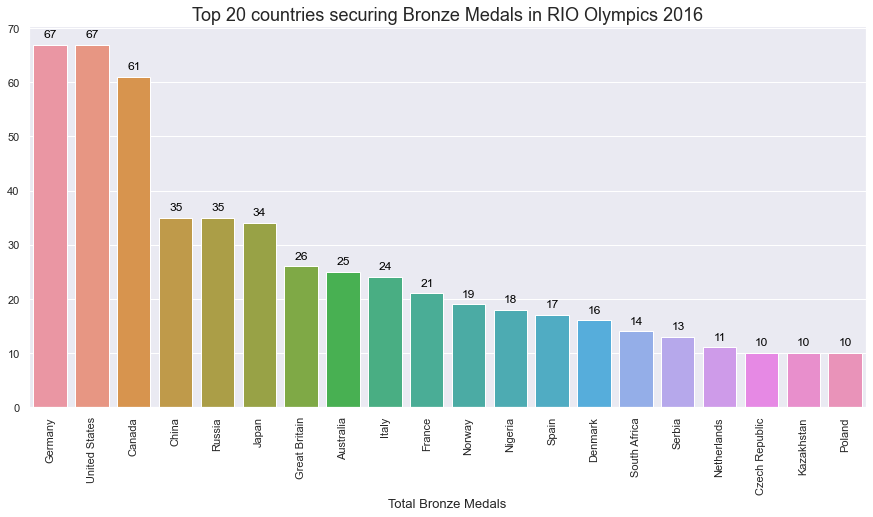

In [129]:
plt.figure(figsize=(15,7));
ax = sns.barplot(y= rio_bronze['Team'].value_counts().head(20), x= rio_bronze['Team'].value_counts().head(20).index);
plt.xlabel("Total Bronze Medals", fontsize=13);
plt.ylabel(None);
plt.xticks(rotation=90);
plt.title('Top 20 countries securing Bronze Medals in RIO Olympics 2016', fontsize=18);

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
plt.show();

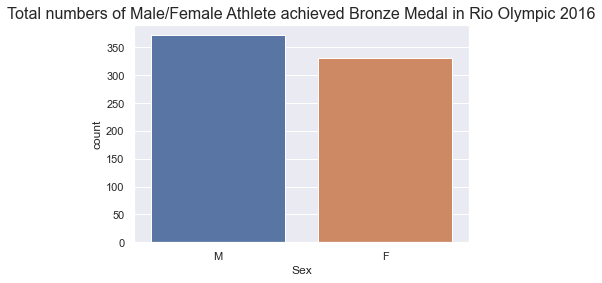

In [142]:
sns.countplot(x= 'Sex', data= rio_bronze);
plt.title('Total numbers of Male/Female Athlete achieved Bronze Medal in Rio Olympic 2016', fontsize= 16);

In [141]:
rio_bm = rio_bronze[['Region','Sex','Medal']].value_counts().reset_index(level= ['Medal','Sex','Region'])
rio_bm.rename(columns= {0:'Count'}, inplace= True)
rio_bm.head()

,Region,Sex,Medal,Count
0,Canada,F,Bronze,53
1,Germany,M,Bronze,44
2,USA,M,Bronze,36
3,USA,F,Bronze,35
4,Germany,F,Bronze,23


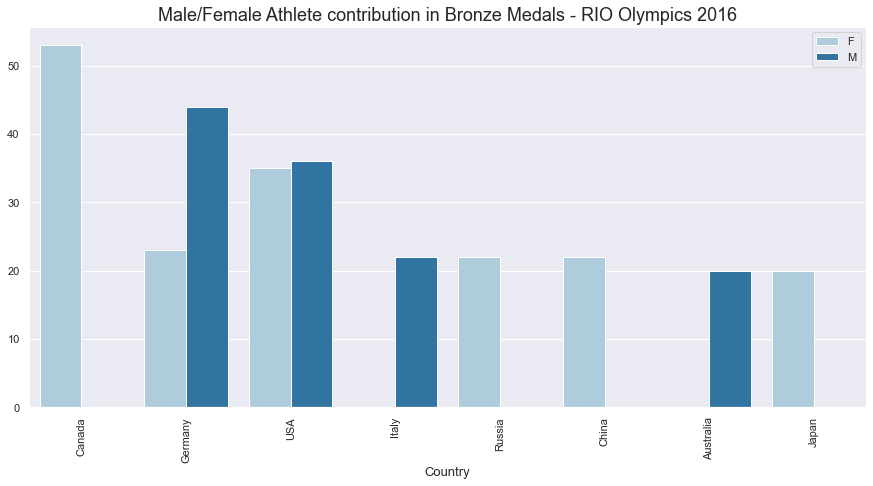

In [132]:
# Top ten countries
rio_bm_10 = rio_bm[(rio_bm.Region.isin(['USA','Germany','Russia','Canada','China','France','Japan','Great Britain','Australia','Italy']))]

plt.figure(figsize=(15,7));
ax = sns.barplot(x= 'Region', y= 'Count', data= rio_bm_10.head(10), hue='Sex', palette='Paired');
plt.xlabel("Country", fontsize=13);
plt.ylabel(None);
plt.xticks(rotation=90);
plt.title('Male/Female Athlete contribution in Bronze Medals - RIO Olympics 2016', fontsize=18);
plt.legend(loc= 'upper right');
